In [83]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report, precision_recall_curve
from sklearn import metrics
from sklearn.utils.multiclass import type_of_target
from sklearn.linear_model import LinearRegression
from sklearn import tree
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [84]:
df = pd.read_csv("/home/daniil_ast/programing/python/statistics/LoLWinsTactic/Data/high_diamond_ranked_10min.csv")

In [85]:
X = df.drop(["gameId" , "blueWins" , "redGoldDiff"], axis = 1)
Y = df.blueWins

In [86]:
X.columns

Index(['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [87]:
X["blueTeamKills"] = X.blueKills / (X.blueAssists+1)
X["redTeamKills"] = X.redKills / (X.redAssists+1)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

In [ ]:
clf = RandomForestClassifier()
parametrs = {
    "n_estimators":range(1,21,2),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,50,5),
    'min_samples_leaf':range(1,50,5)
}

search = RandomizedSearchCV(clf,parametrs,cv=5,n_jobs=-1)
search.fit(X_train,y_train)

In [90]:
best_forest = search.best_estimator_
train_score = best_forest.score(X_train,y_train)
test_score = best_forest.score(X_test,y_test)
train_score, test_score

(0.7415305709272506, 0.7174089068825911)

In [91]:
X.corr()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTeamKills,redTeamKills
blueWardsPlaced,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,0.009462,...,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.027943,-0.012395,-0.005685,-0.020828,0.003168
blueWardsDestroyed,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,-0.009150,...,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.077946,0.040023,-0.067467,-0.053220,-0.024678
blueFirstBlood,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,0.083316,...,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.240665,-0.156711,-0.301479,0.039551,-0.034794
blueKills,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,0.180314,...,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.583730,-0.472203,-0.161127,0.136493,0.031896
blueDeaths,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,-0.071441,...,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.577613,-0.040521,0.885728,0.045093,0.114116
blueAssists,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,0.123663,...,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.437002,-0.337515,-0.133948,-0.325322,-0.017964
blueEliteMonsters,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,0.166644,...,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.263991,-0.074838,-0.216616,0.021346,-0.030373
blueDragons,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,0.039750,...,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.211496,-0.059803,-0.192871,-0.011851,-0.007810
blueHeralds,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,0.217901,...,-0.109557,-0.087337,-0.107718,-0.046253,-0.019622,-0.162496,-0.046253,-0.109557,0.048752,-0.039020
blueTowersDestroyed,0.009462,-0.009150,0.083316,0.180314,-0.071441,0.123663,0.166644,0.039750,0.217901,1.000000,...,-0.122465,-0.204429,-0.210167,-0.186879,-0.038505,-0.218320,-0.186879,-0.122465,0.048636,-0.035076


In [92]:
X = X.drop(["redKills" , "redDeaths","redFirstBlood"],axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

In [94]:
clf = tree.DecisionTreeClassifier()
parametrs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,20),
    'min_samples_split': range(1,50,5),
    'min_samples_leaf':range(1,50,5)
}

search = RandomizedSearchCV(clf,parametrs,cv=5,n_jobs=-1)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(1, 50, 5),
                                        'min_samples_split': range(1, 50, 5)})

In [95]:
best_tree = search.best_estimator_
train_score = best_tree.score(X_train,y_train)
test_score = best_tree.score(X_test,y_test)
train_score, test_score

(0.7280334728033473, 0.7137651821862349)

<Axes: >

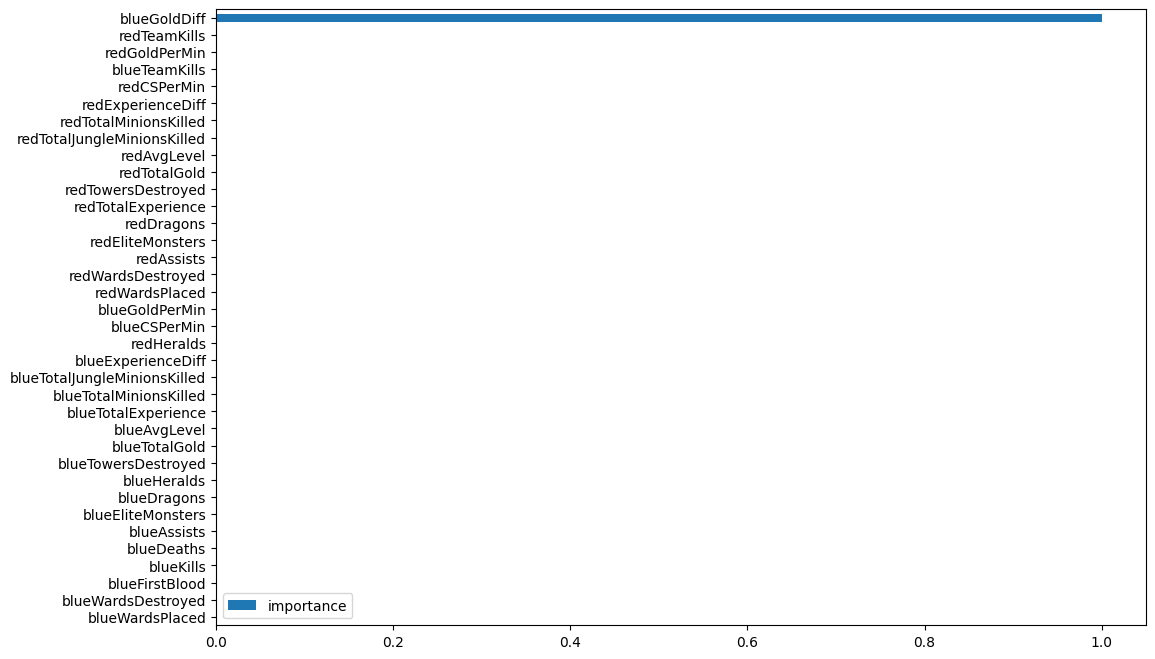

In [96]:
imp = pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [97]:
X = X.drop(["blueKills" , "blueDeaths" , "redExperienceDiff"],axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

In [ ]:
clf = RandomForestClassifier()
parametrs = {
    "n_estimators":range(1,21,2),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,20),
    'min_samples_split': range(1,50,5),
    'min_samples_leaf':range(1,50,5)
}

search = RandomizedSearchCV(clf,parametrs,cv=5,n_jobs=-1)
search.fit(X_train,y_train)

In [100]:
best_forest = search.best_estimator_
train_score = best_forest.score(X_train,y_train)
test_score = best_forest.score(X_test,y_test)
train_score, test_score

(0.751113510595222, 0.7238866396761133)

<Axes: >

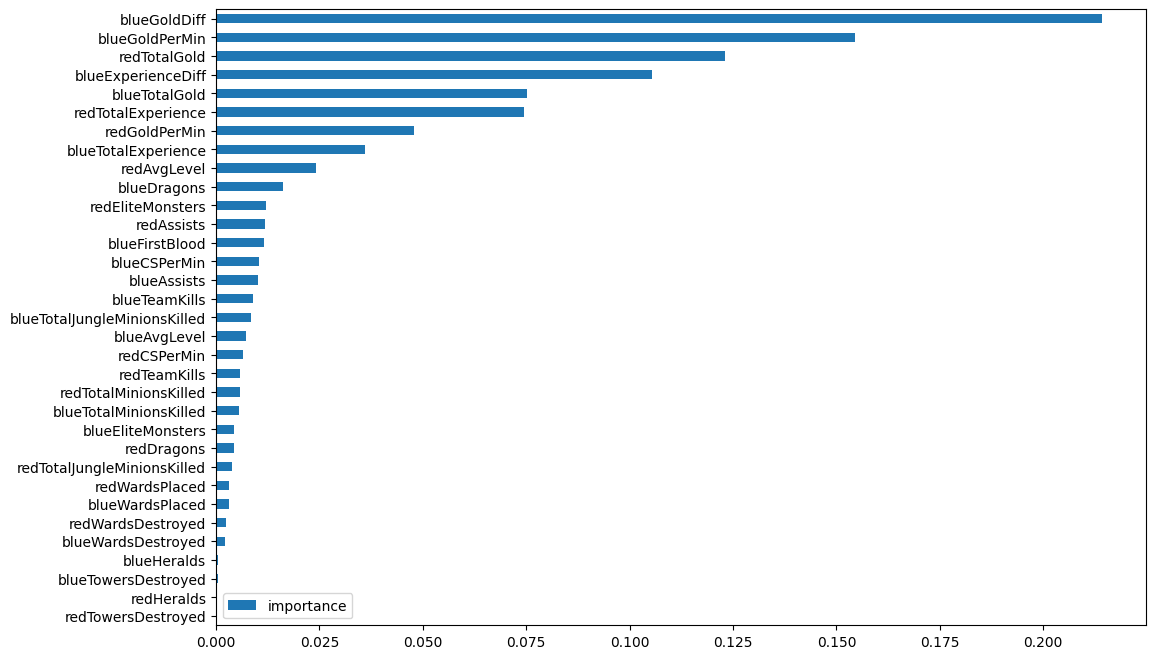

In [101]:
imp = pd.DataFrame(best_forest.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [79]:
best_tree.feature_importances_

array([0.00309977, 0.00295663, 0.00506561, 0.0080822 , 0.00496331,
       0.00627872, 0.00084198, 0.        , 0.06264523, 0.01468169,
       0.0609623 , 0.00838664, 0.01116113, 0.13275988, 0.1689423 ,
       0.00833526, 0.12066444, 0.00393494, 0.00445929, 0.01382148,
       0.00568649, 0.01395714, 0.00059313, 0.        , 0.11454408,
       0.02269015, 0.07654757, 0.00592671, 0.00676626, 0.01247159,
       0.08535275, 0.00553504, 0.00788629])